**本文分析了沪深300指数历史数据并对其未来走势进行预测**

报告生成日期：2021年10月10日

分析过程如下：
- 收集数据
- 清洗数据
- 观察数据
- 建立分析指标
- 可视化数据
- 生成报告

In [1]:
import tushare as ts
import baostock as bs
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import preprocessing, model_selection
from sklearn.linear_model import LinearRegression
from datetime import datetime

style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


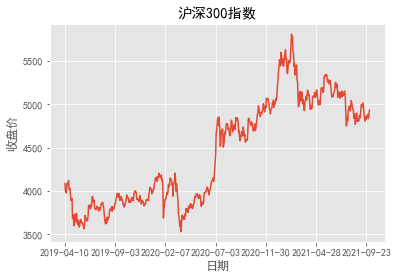

In [2]:
hs300Df = ts.get_hist_data('399300')[['open','high','close','low','volume']]
hs300Df = hs300Df.iloc[::-1]
hs300Df['close'].plot()
plt.title('沪深300指数')
plt.xlabel('日期')
plt.ylabel('收盘价')
plt.grid(True)
plt.show()

In [3]:
def change(column,ticket):
    buyPrice=column[0]
    sellPrice=column[-1]
    priceChange=(sellPrice-buyPrice)/buyPrice
    if(priceChange>0):
        print(ticket+'累计上涨=',priceChange)
    elif(priceChange<0):
        print(ticket+'累计下跌=',priceChange)
    else:
        print(ticket+'累计没有变化=',priceChange)
    return priceChange

In [4]:
change(hs300Df['close'],"沪深300指数")
hs300Df.describe()

沪深300指数累计上涨= 0.20658859233696775


,open,high,close,low,volume
count,607.000000,607.000000,607.000000,607.000000,6.070000e+02
mean,4448.510774,4481.817381,4451.498451,4414.616474,1.449360e+08
std,599.199803,604.990392,598.831243,590.240553,5.320045e+07
min,3542.680000,3585.800000,3530.310000,3503.190000,1.961600e+04
25%,3890.115000,3908.260000,3891.440000,3868.265000,1.039998e+08
50%,4535.010000,4599.540000,4528.450000,4482.440000,1.372023e+08
75%,4981.610000,5023.205000,4980.700000,4940.600000,1.723670e+08
max,5922.070000,5930.910000,5807.720000,5747.660000,4.060085e+08


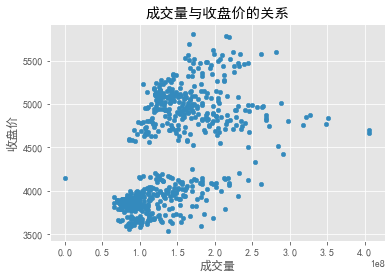

In [5]:
hs300Df.plot(x='volume',y='close',kind='scatter',title='成交量与收盘价的关系',grid=True)
plt.xlabel('成交量')
plt.ylabel('收盘价')
plt.show()

In [6]:
hs300Df.corr()

,open,high,close,low,volume
open,1.000000,0.998597,0.996354,0.998438,0.512970
high,0.998597,1.000000,0.998512,0.998379,0.529733
close,0.996354,0.998512,1.000000,0.998596,0.516826
low,0.998438,0.998379,0.998596,1.000000,0.502875
volume,0.512970,0.529733,0.516826,0.502875,1.000000


可见收盘价与成交量**相关性不大**

In [7]:
bs.login()
rs = bs.query_hs300_stocks()
hs300_stocks = []
while rs.next():
    hs300_stocks.append(rs.get_row_data())
result = pd.DataFrame(hs300_stocks, columns = rs.fields)
bs.logout()
print(result)

login success!
logout success!
     updateDate       code code_name
0    2021-10-04  sh.600000      浦发银行
1    2021-10-04  sh.600009      上海机场
2    2021-10-04  sh.600010      包钢股份
3    2021-10-04  sh.600011      华能国际
4    2021-10-04  sh.600015      华夏银行
..          ...        ...       ...
295  2021-10-04  sz.300595      欧普康视
296  2021-10-04  sz.300601      康泰生物
297  2021-10-04  sz.300628      亿联网络
298  2021-10-04  sz.300676      华大基因
299  2021-10-04  sz.300677      英科医疗

[300 rows x 3 columns]


本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽

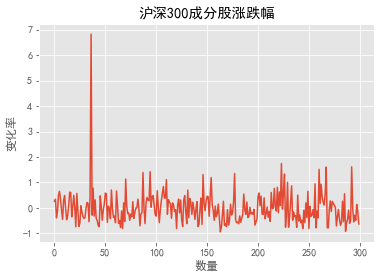

In [8]:
dataset = {}
for ticket in hs300_stocks:
    stock_name = ticket[2]
    stock_code = ticket[1][3:]
    dataset[stock_name] = ts.get_hist_data(stock_code)
    
changeData = []
for i in range(300):
    changeData.append(change(list(dataset.values())[i]['close'],list(dataset.keys())[i]))
plt.plot(changeData)
plt.title('沪深300成分股涨跌幅')
plt.xlabel('数量')
plt.ylabel('变化率')
plt.grid(True)
plt.show()

In [9]:
changeDataDf = pd.DataFrame(changeData)
fall=(changeDataDf[0] > 0).sum()/300*100.0
print('上升股票占比：'+str(fall)+'%')

上升股票占比：42.0%


可见沪深300成分股中盈利股票数量**不足二分之一**，买到亏损股票可能性超过50%

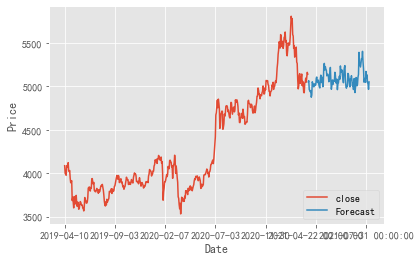

In [10]:
forecast_col = 'close'
forecast_out = int(math.ceil(0.2*len(hs300Df)))

df = hs300Df[['open', 'high', 'low', 'close', 'volume']].copy()
df['HL_PCT'] = (df['high'] - df['low'])/ df['low'] * 100.0
df['PCT_change'] = (df['close'] - df['open']) / df['open'] * 100.0

df = df[['close', 'HL_PCT', 'PCT_change', 'volume']]
df.fillna(-99999, inplace=True)
df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], axis=1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
df.dropna(inplace=True)
y = np.array(df['label'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.01)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test) 
forecast_set = clf.predict(X_lately)

one_day = 86400
df['Forecast'] = np.nan
last_date = datetime.strptime(df.iloc[-1].name,'%Y-%m-%d')
last_unix = last_date.timestamp()
next_unix = last_unix + one_day
for i in forecast_set:
    next_date = datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]

df['close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

采用scikit-learn线性回归预测沪深300指数走势，可见**中长期内将保持稳步上升**形态，故从资产保值增值角度出发，购买沪深300指数是更为稳健的做法。但考虑到**近期有下行风险**，建议控制投资规模。